<a href="https://colab.research.google.com/github/AmauriKudaka/Astro/blob/master/Astroifnorm%C3%A1tica_II_Aula_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install astroml

     |████████████████████████████████| 112kB 2.7MB/s 
  Created wheel for astroml: filename=astroML-0.4.1-cp36-none-any.whl size=128663 sha256=38c16a816408d57e47acf319864e3d295f319c1e6827109f956e81caaf4ce4d0
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroml


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: covariance is not symmetric positive-semidefinite.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: covariance is not symmetric positive-semidefinite.


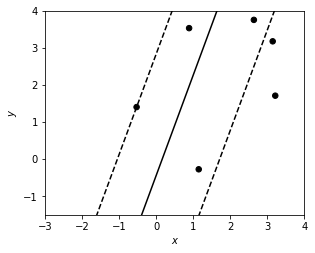

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm


np.random.seed(1)

N1 = 10
N2 = 10
mu1 = np.array([1.0, 1.00])
mu2 = np.array([2.0, 2.0])

Cov1 = np.array([[1, 5],
                [5, 1]])

#Cov1 = np.array([[1, 0.25],
                #[0.25, 1]])

#Cov1 = np.array([[1, -0.25],
                #[-0.25, 1]])
Cov2 = Cov1

X = np.vstack([np.random.multivariate_normal(mu1, Cov1, N1),
               np.random.multivariate_normal(mu2, Cov2, N2)])
y = np.hstack([np.zeros(N1), np.ones(N2)])

#print (X)
#print (y)

#------------------------------------------------------------
# Perform an SVM classification
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

xx = np.linspace(-5, 5)
w = clf.coef_[0]
m = -w[0] / w[1]
b = - clf.intercept_[0] / w[1]
yy = m * xx + b

#------------------------------------------------------------
# find support vectors
i1 = np.argmax(np.dot(X[:N1], w))
i2 = N1 + np.argmin(np.dot(X[N1:], w))

db1 = X[i1, 1] - (m * X[i1, 0] + b)
db2 = X[i2, 1] - (m * X[i2, 0] + b)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111, aspect='equal')

ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.binary)
ax.plot(xx, yy, '-k')
ax.plot(xx, yy + db1, '--k')
ax.plot(xx, yy + db2, '--k')

ax.set_ylim(-1.5, 4)
ax.set_xlim(-3, 4)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


nan
nan
@pickle_results: using precomputed results from 'SVM_rrlyrae.pkl'
completeness [0.99270073 1.         1.         1.        ]
contamination [0.90014684 0.85347594 0.85347594 0.85471898]


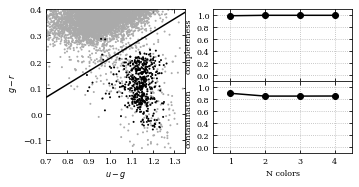

In [15]:
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from astroML.utils.decorators import pickle_results
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


#Desafio calcular média



#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results

# SVM takes several minutes to run, and is order[N^2]
#  truncating the dataset can be useful for experimentation.
#X = X[::5]
#y = y[::5]

print((X[:0]-X[:1]).mean())
print((X[:0]-X[:1]).std())
# limpar os dados para evitar Na ( n)

(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# Fit SVM
Ncolors = np.arange(1, X.shape[1] + 1)


@pickle_results('SVM_rrlyrae.pkl')
def compute_SVM(Ncolors):
    classifiers = []
    predictions = []

    for nc in Ncolors:
        # perform support vector classification
        clf = SVC(kernel='linear', class_weight='balanced')
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])

        classifiers.append(clf)
        predictions.append(y_pred)

    return classifiers, predictions

classifiers, predictions = compute_SVM(Ncolors)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# compute the decision boundary
clf = classifiers[1]
w = clf.coef_[0]
a = -w[0] / w[1]
yy = np.linspace(-0.1, 0.4)
xx = a * yy - clf.intercept_[0] / w[1]

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
ax.plot(xx, yy, '-k')
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

ax.set_xlim(0.7, 1.35)
ax.set_ylim(-0.15, 0.4)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()